In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from collections import defaultdict

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
conferences_file = os.path.join("..", "data", "interim", "WikiCFP", "WikiCFP_conferences.pkl")
os.path.isfile(conferences_file)

True

In [4]:
# Load crawled conferences
global conferences
conferences = pd.DataFrame()
with open(conferences_file, "rb") as f:
    conferences = pickle.load(f)

In [5]:
print("Total number of conferences crawled: {}.".format(len(conferences)))

Total number of conferences crawled: 4902.


## Conferences per year

In [6]:
def getConferencesPerYear(year):
    conferences_in_year = pd.DataFrame()
    if conferences.start_date.astype(str).str.contains(year).any():
        conferences_in_year = conferences[conferences.start_date.astype(str).str.contains(year)]            
    else:
        print("There are no conferences taking place in {}.\n".format(year))

    return conferences_in_year

In [7]:
cols = ['year', 'count_conferences']
data = []
for year in range(2018,2022):
    no_conf = len(getConferencesPerYear(str(year)))
    data.append([year, no_conf])
yearly_conferences = pd.DataFrame(data, columns=cols)

In [8]:
yearly_conferences

,year,count_conferences
0,2018,3
1,2019,1244
2,2020,3282
3,2021,25


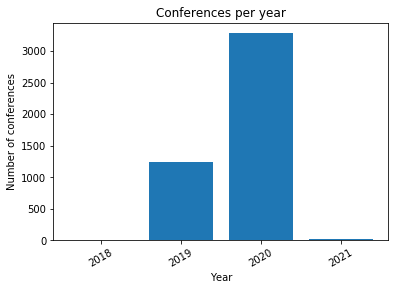

In [9]:
# Plot distribution of conferences per year
years = yearly_conferences['year'].tolist()
index = np.arange(len(years))
no_conf = yearly_conferences['count_conferences'].tolist()
plt.bar(index, no_conf, align = 'center')
plt.xlabel('Year')
plt.ylabel('Number of conferences')
plt.title('Conferences per year')
plt.xticks(index, years, rotation=30)
plt.show()

In [10]:
print("Mean # of conferences per year: {}".format(round(yearly_conferences.mean()[1],2)))
print("Median # of conferences per year: {}".format(round(yearly_conferences.median()[1], 2)))

Mean # of conferences per year: 1138.5
Median # of conferences per year: 634.5


## Conferences with incomplete information

In [11]:
no_start_date = set(conferences.index[conferences.start_date.isnull()])
no_end_date = set(conferences.index[conferences.end_date.isnull()])
no_location = set(conferences.index[conferences.location.isnull()])
no_submission_deadline = set(conferences.index[conferences.submission_deadline.isnull()])

print("Confereneces without start date: {}".format(len(no_start_date)))
print("Confereneces without end date: {}".format(len(no_end_date)))
print("Confereneces without location: {}".format(len(no_location)))
print("Confereneces without submission deadline: {}".format(len(no_submission_deadline)))

no_date_location = no_start_date.union(no_location)
print("Conferences without date or location: {}".format(len(no_date_location)))

no_date_loc_deadline = no_date_location.union(no_submission_deadline)
print("Conferences without date, location, or submission deadline: {}".format(len(no_date_loc_deadline)))

Confereneces without start date: 338
Confereneces without end date: 338
Confereneces without location: 374
Confereneces without submission deadline: 369
Conferences without date or location: 386
Conferences without date, location, or submission deadline: 703


In [12]:
a = no_start_date.intersection(no_location)
len(no_location.intersection(no_submission_deadline))

49

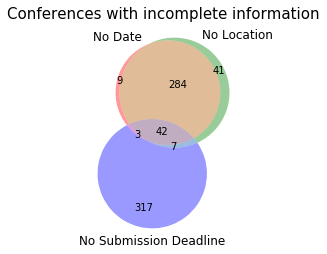

In [13]:
v = venn3([no_start_date, no_location, no_submission_deadline], 
      set_labels = ('No Date', 'No Location', 'No Submission Deadline'))
plt.title('Conferences with incomplete information', fontsize = 15)
plt.show()

## Conferences per category

In [14]:
categories = set(category for categories in conferences.categories.tolist() for category in categories)
print("Categories: {}".format(len(categories)))

Categories: 4279


In [15]:
conf_list = conferences.index.tolist()
count_categ = list()
for index in conferences.index.tolist():
    count_categ.append(len(conferences.categories[index]))
categ_per_conf = pd.DataFrame({"conference": conf_list, "count_categories": count_categ})

In [16]:
categ_per_conf.head()

,conference,count_categories
0,90002,4
1,90006,4
2,90007,4
3,90008,3
4,90009,3


In [17]:
count_with_category = len(categ_per_conf[categ_per_conf["count_categories"]>0])
count_without_category = len(categ_per_conf[categ_per_conf["count_categories"]==0])
print("Conferences with at least a category: {}".format(count_with_category))
print("Conferences without a category: {}".format(count_without_category))

Conferences with at least a category: 4455
Conferences without a category: 447


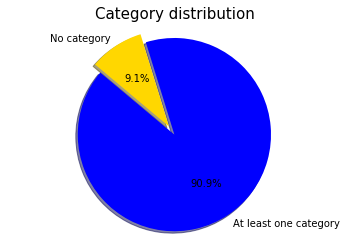

In [18]:
# Plot category distribution
labels = 'At least one category', 'No category'
sizes = [count_with_category, count_without_category]
colors = ['blue', 'gold']
explode = (0, 0.1)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Category distribution", fontsize = 15)
plt.axis('equal')
plt.show()

In [19]:
# Category distribution per conference
print("Mean # of categories per conferences: {}".format(round(categ_per_conf.mean()[1], 2)))
print("Median # of categories per conferences: {}".format(round(categ_per_conf.median()[1], 2)))

Mean # of categories per conferences: 3.3
Median # of categories per conferences: 4.0


In [20]:
conf_per_categ = defaultdict(int)
for category in categories:
    print("Searching for category: {}".format(category))
    for index in conferences.index.tolist():
        if category in conferences['categories'][index]:
            conf_per_categ[category] += 1
    print("Finished searching for category: {}\n".format(category))

Searching for category: haptics
Finished searching for category: haptics

Searching for category: tourism
Finished searching for category: tourism

Searching for category: cloud infrastructure
Finished searching for category: cloud infrastructure

Searching for category: performance modeling
Finished searching for category: performance modeling

Searching for category: quality assurance
Finished searching for category: quality assurance

Searching for category: data analytics and cloud compu
Finished searching for category: data analytics and cloud compu

Searching for category: r studio
Finished searching for category: r studio

Searching for category: collaboration
Finished searching for category: collaboration

Searching for category: software defined systems
Finished searching for category: software defined systems

Searching for category: metrics
Finished searching for category: metrics

Searching for category: radio frequency
Finished searching for category: radio frequency

Sear

Finished searching for category: component-based iot

Searching for category: obstetrics gynecology
Finished searching for category: obstetrics gynecology

Searching for category: vascular biology
Finished searching for category: vascular biology

Searching for category: geo-sensing
Finished searching for category: geo-sensing

Searching for category: experiment
Finished searching for category: experiment

Searching for category: pediatrics nutrition
Finished searching for category: pediatrics nutrition

Searching for category: information tech and computer
Finished searching for category: information tech and computer

Searching for category: tradition
Finished searching for category: tradition

Searching for category: e-commerce
Finished searching for category: e-commerce

Searching for category: content
Finished searching for category: content

Searching for category: polymerchemistry
Finished searching for category: polymerchemistry

Searching for category: food microbiology, food 

Finished searching for category: impaired and augmented man

Searching for category: industrial automation
Finished searching for category: industrial automation

Searching for category: decentralized
Finished searching for category: decentralized

Searching for category: technopreunership
Finished searching for category: technopreunership

Searching for category: ict, education
Finished searching for category: ict, education

Searching for category: dependable
Finished searching for category: dependable

Searching for category: medicine conferences
Finished searching for category: medicine conferences

Searching for category: ict in education
Finished searching for category: ict in education

Searching for category: data challenge
Finished searching for category: data challenge

Searching for category: unmanned aerial system
Finished searching for category: unmanned aerial system

Searching for category: fashion
Finished searching for category: fashion

Searching for category: society

Finished searching for category: edge and fog computing

Searching for category: TROPICAL DISEASES
Finished searching for category: TROPICAL DISEASES

Searching for category: political identity
Finished searching for category: political identity

Searching for category: virology & immunology
Finished searching for category: virology & immunology

Searching for category: NIH
Finished searching for category: NIH

Searching for category: enviromental microbiology
Finished searching for category: enviromental microbiology

Searching for category: knowledge
Finished searching for category: knowledge

Searching for category: plastic surgery
Finished searching for category: plastic surgery

Searching for category: distributed computing
Finished searching for category: distributed computing

Searching for category: transmission & distribution
Finished searching for category: transmission & distribution

Searching for category: judaic studies
Finished searching for category: judaic studies

Sea

Finished searching for category: material

Searching for category: physiotherapy
Finished searching for category: physiotherapy

Searching for category: NGN
Finished searching for category: NGN

Searching for category: game theory concept
Finished searching for category: game theory concept

Searching for category: economy
Finished searching for category: economy

Searching for category: software language engineering
Finished searching for category: software language engineering

Searching for category: mathematical modeling and nume
Finished searching for category: mathematical modeling and nume

Searching for category: human rights law
Finished searching for category: human rights law

Searching for category: mental illness conference
Finished searching for category: mental illness conference

Searching for category: automated reasoning
Finished searching for category: automated reasoning

Searching for category: bionlp
Finished searching for category: bionlp

Searching for category:

Finished searching for category: HIV-AIDS

Searching for category: sponsor
Finished searching for category: sponsor

Searching for category: prison
Finished searching for category: prison

Searching for category: gui testing
Finished searching for category: gui testing

Searching for category: engineering indexed
Finished searching for category: engineering indexed

Searching for category: computational social science
Finished searching for category: computational social science

Searching for category: applied mechanics
Finished searching for category: applied mechanics

Searching for category: geospatial ai
Finished searching for category: geospatial ai

Searching for category: performance measurement
Finished searching for category: performance measurement

Searching for category: applications for smart cities
Finished searching for category: applications for smart cities

Searching for category: web search
Finished searching for category: web search

Searching for category: distrib

Finished searching for category: sencha

Searching for category: mechanical
Finished searching for category: mechanical

Searching for category: learning strategies
Finished searching for category: learning strategies

Searching for category: location-based services
Finished searching for category: location-based services

Searching for category: BIGDATA
Finished searching for category: BIGDATA

Searching for category: research science
Finished searching for category: research science

Searching for category: addiction rehabitation
Finished searching for category: addiction rehabitation

Searching for category: project management
Finished searching for category: project management

Searching for category: smart learning environments
Finished searching for category: smart learning environments

Searching for category: distributed
Finished searching for category: distributed

Searching for category: SDG
Finished searching for category: SDG

Searching for category: 2.health data acquisiti

Finished searching for category: second language acquisition

Searching for category: network design
Finished searching for category: network design

Searching for category: ecosystems
Finished searching for category: ecosystems

Searching for category: evolutionary computing
Finished searching for category: evolutionary computing

Searching for category: general pediatrics
Finished searching for category: general pediatrics

Searching for category: devices
Finished searching for category: devices

Searching for category: game-based learning
Finished searching for category: game-based learning

Searching for category: hackathons
Finished searching for category: hackathons

Searching for category: computer vsion and image proc
Finished searching for category: computer vsion and image proc

Searching for category: circuits
Finished searching for category: circuits

Searching for category: knowlege
Finished searching for category: knowlege

Searching for category: financial-cryptography
F

Finished searching for category: identity management

Searching for category: knowledge processing
Finished searching for category: knowledge processing

Searching for category: water for food
Finished searching for category: water for food

Searching for category: flipped classroom
Finished searching for category: flipped classroom

Searching for category: medical image analysis
Finished searching for category: medical image analysis

Searching for category: counselling
Finished searching for category: counselling

Searching for category: METALLURGY AND MATERIALS
Finished searching for category: METALLURGY AND MATERIALS

Searching for category: rocks
Finished searching for category: rocks

Searching for category: hmi for explainable ai
Finished searching for category: hmi for explainable ai

Searching for category: applied statistics
Finished searching for category: applied statistics

Searching for category: catalysis and zeolites, biolog
Finished searching for category: catalysis an

Finished searching for category: green design

Searching for category: medical humanities
Finished searching for category: medical humanities

Searching for category: game ai
Finished searching for category: game ai

Searching for category: managment
Finished searching for category: managment

Searching for category: online information
Finished searching for category: online information

Searching for category: mechatronics engineering
Finished searching for category: mechatronics engineering

Searching for category: public policies on aging
Finished searching for category: public policies on aging

Searching for category: big data and analytics
Finished searching for category: big data and analytics

Searching for category: stem cells
Finished searching for category: stem cells

Searching for category: hemo-oncology
Finished searching for category: hemo-oncology

Searching for category: cardiology
Finished searching for category: cardiology

Searching for category: predictive maintena

Finished searching for category: decision science

Searching for category: social web
Finished searching for category: social web

Searching for category: wireless technologies
Finished searching for category: wireless technologies

Searching for category: network edge cloud
Finished searching for category: network edge cloud

Searching for category: industry 4.0
Finished searching for category: industry 4.0

Searching for category: techno-philosophy
Finished searching for category: techno-philosophy

Searching for category: engineeting
Finished searching for category: engineeting

Searching for category: INTERNATIONAL
Finished searching for category: INTERNATIONAL

Searching for category: medical conference
Finished searching for category: medical conference

Searching for category: end-user development
Finished searching for category: end-user development

Searching for category: polymer materials
Finished searching for category: polymer materials

Searching for category: urban studi

Finished searching for category: psychotherapy

Searching for category: sexuality
Finished searching for category: sexuality

Searching for category: autonomy
Finished searching for category: autonomy

Searching for category: aesthetic medicine
Finished searching for category: aesthetic medicine

Searching for category: nutrition and obesity
Finished searching for category: nutrition and obesity

Searching for category: electric vehicle
Finished searching for category: electric vehicle

Searching for category: dataset
Finished searching for category: dataset

Searching for category: dark side
Finished searching for category: dark side

Searching for category: ESL
Finished searching for category: ESL

Searching for category: ECUCACIÃN
Finished searching for category: ECUCACIÃN

Searching for category: operated vehicle
Finished searching for category: operated vehicle

Searching for category: industrial engineering
Finished searching for category: industrial engineering

Searching for 

Finished searching for category: wellness

Searching for category: flood
Finished searching for category: flood

Searching for category: meet up
Finished searching for category: meet up

Searching for category: managers,
Finished searching for category: managers,

Searching for category: advanced nursing
Finished searching for category: advanced nursing

Searching for category: transplantation
Finished searching for category: transplantation

Searching for category: seismic behaviour
Finished searching for category: seismic behaviour

Searching for category: ecotourism
Finished searching for category: ecotourism

Searching for category: smart embedded systems
Finished searching for category: smart embedded systems

Searching for category: stellar astronomy
Finished searching for category: stellar astronomy

Searching for category: social change
Finished searching for category: social change

Searching for category: data mining
Finished searching for category: data mining

Searching for

Finished searching for category: neural architecture search

Searching for category: international business
Finished searching for category: international business

Searching for category: natural science
Finished searching for category: natural science

Searching for category: regenerative medicine
Finished searching for category: regenerative medicine

Searching for category: energy systems
Finished searching for category: energy systems

Searching for category: genome
Finished searching for category: genome

Searching for category: pediatric dentristry
Finished searching for category: pediatric dentristry

Searching for category: special needs
Finished searching for category: special needs

Searching for category: language technology
Finished searching for category: language technology

Searching for category: automation and robotic
Finished searching for category: automation and robotic

Searching for category: semantic blockchain
Finished searching for category: semantic blockchai

Finished searching for category: BPM

Searching for category: cultural informatics
Finished searching for category: cultural informatics

Searching for category: system security
Finished searching for category: system security

Searching for category: intellectual history
Finished searching for category: intellectual history

Searching for category: fossil
Finished searching for category: fossil

Searching for category: blended education
Finished searching for category: blended education

Searching for category: engineering management
Finished searching for category: engineering management

Searching for category: narrative generation system
Finished searching for category: narrative generation system

Searching for category: air pollution
Finished searching for category: air pollution

Searching for category: cultural sustainability
Finished searching for category: cultural sustainability

Searching for category: game based learning
Finished searching for category: game based learning

Finished searching for category: heath sciences

Searching for category: emerging topics
Finished searching for category: emerging topics

Searching for category: violence
Finished searching for category: violence

Searching for category: cursive script recognition
Finished searching for category: cursive script recognition

Searching for category: strategic management
Finished searching for category: strategic management

Searching for category: veterinary epidemiology
Finished searching for category: veterinary epidemiology

Searching for category: recommendation
Finished searching for category: recommendation

Searching for category: reproductive health and medici
Finished searching for category: reproductive health and medici

Searching for category: sensor network
Finished searching for category: sensor network

Searching for category: nanotechnology in agriculture
Finished searching for category: nanotechnology in agriculture

Searching for category: computer networks
Finished se

Finished searching for category: quality standards

Searching for category: telecommunication
Finished searching for category: telecommunication

Searching for category: europe
Finished searching for category: europe

Searching for category: biology : plant science
Finished searching for category: biology : plant science

Searching for category: evolution
Finished searching for category: evolution

Searching for category: OBESITY
Finished searching for category: OBESITY

Searching for category: automated machine learning
Finished searching for category: automated machine learning

Searching for category: BIOGRAPHY
Finished searching for category: BIOGRAPHY

Searching for category: UX
Finished searching for category: UX

Searching for category: hybrid/printed electronics
Finished searching for category: hybrid/printed electronics

Searching for category: petroleum
Finished searching for category: petroleum

Searching for category: renewable energy integration
Finished searching for cate

Finished searching for category: animal veterinary & livestock

Searching for category: breast and cervical cancer
Finished searching for category: breast and cervical cancer

Searching for category: agriculture
Finished searching for category: agriculture

Searching for category: knowledge discovery
Finished searching for category: knowledge discovery

Searching for category: visual environments
Finished searching for category: visual environments

Searching for category: user model
Finished searching for category: user model

Searching for category: peacebuilding
Finished searching for category: peacebuilding

Searching for category: wireless networks
Finished searching for category: wireless networks

Searching for category: is technology
Finished searching for category: is technology

Searching for category: connectivity
Finished searching for category: connectivity

Searching for category: ageing
Finished searching for category: ageing

Searching for category: fuzzy
Finished searc

Finished searching for category: adaptives systems

Searching for category: neuro oncology
Finished searching for category: neuro oncology

Searching for category: nursing practice-career and re
Finished searching for category: nursing practice-career and re

Searching for category: supplychain
Finished searching for category: supplychain

Searching for category: workshops
Finished searching for category: workshops

Searching for category: robin hood
Finished searching for category: robin hood

Searching for category: vehicular networks
Finished searching for category: vehicular networks

Searching for category: vehicles
Finished searching for category: vehicles

Searching for category: future studies
Finished searching for category: future studies

Searching for category: nurse
Finished searching for category: nurse

Searching for category: english literature
Finished searching for category: english literature

Searching for category: life sciences
Finished searching for category: lif

Finished searching for category: interactive systems

Searching for category: 3d objects recognition and pro
Finished searching for category: 3d objects recognition and pro

Searching for category: marketing
Finished searching for category: marketing

Searching for category: test
Finished searching for category: test

Searching for category: sentiment analysis
Finished searching for category: sentiment analysis

Searching for category: intelligent medical systems
Finished searching for category: intelligent medical systems

Searching for category: vlsi, networks and systems
Finished searching for category: vlsi, networks and systems

Searching for category: geometry
Finished searching for category: geometry

Searching for category: general studies
Finished searching for category: general studies

Searching for category: transfusion medicine
Finished searching for category: transfusion medicine

Searching for category: projects
Finished searching for category: projects

Searching for ca

Finished searching for category: interactive media

Searching for category: crowdsensing
Finished searching for category: crowdsensing

Searching for category: technology innovation
Finished searching for category: technology innovation

Searching for category: pediatric & geriatric cardiolo
Finished searching for category: pediatric & geriatric cardiolo

Searching for category: melonoma
Finished searching for category: melonoma

Searching for category: conservation
Finished searching for category: conservation

Searching for category: scientific discovery
Finished searching for category: scientific discovery

Searching for category: diseases
Finished searching for category: diseases

Searching for category: microbiology
Finished searching for category: microbiology

Searching for category: cosmetic dermatology
Finished searching for category: cosmetic dermatology

Searching for category: bariatric surgery
Finished searching for category: bariatric surgery

Searching for category: arti

Finished searching for category: bioinformation

Searching for category: architectures
Finished searching for category: architectures

Searching for category: food technology
Finished searching for category: food technology

Searching for category: informatic health
Finished searching for category: informatic health

Searching for category: archaeological studies
Finished searching for category: archaeological studies

Searching for category: communication,environment
Finished searching for category: communication,environment

Searching for category: e-health
Finished searching for category: e-health

Searching for category: spectrum management
Finished searching for category: spectrum management

Searching for category: applications of fuzzy logic
Finished searching for category: applications of fuzzy logic

Searching for category: agents
Finished searching for category: agents

Searching for category: data services
Finished searching for category: data services

Searching for categor

Finished searching for category: diet

Searching for category: diversity
Finished searching for category: diversity

Searching for category: agent-based computing and dai
Finished searching for category: agent-based computing and dai

Searching for category: ambient assisted living
Finished searching for category: ambient assisted living

Searching for category: CIENCIAS DE LA INGENIERÃA
Finished searching for category: CIENCIAS DE LA INGENIERÃA

Searching for category: molecular physics
Finished searching for category: molecular physics

Searching for category: pediatric nursing
Finished searching for category: pediatric nursing

Searching for category: humboldt
Finished searching for category: humboldt

Searching for category: ontology
Finished searching for category: ontology

Searching for category: nano technologies
Finished searching for category: nano technologies

Searching for category: mobile robotics
Finished searching for category: mobile robotics

Searching for category:

Finished searching for category: addition

Searching for category: american literature
Finished searching for category: american literature

Searching for category: human sciences
Finished searching for category: human sciences

Searching for category: decentralization
Finished searching for category: decentralization

Searching for category: climate justice
Finished searching for category: climate justice

Searching for category: spatio-temporal data
Finished searching for category: spatio-temporal data

Searching for category: sql server
Finished searching for category: sql server

Searching for category: surface
Finished searching for category: surface

Searching for category: 3d user interfaces
Finished searching for category: 3d user interfaces

Searching for category: chemistry
Finished searching for category: chemistry

Searching for category: biomechanics
Finished searching for category: biomechanics

Searching for category: decentralisation
Finished searching for category: dec

Finished searching for category: military history

Searching for category: information theory
Finished searching for category: information theory

Searching for category: brain imaging
Finished searching for category: brain imaging

Searching for category: fuzzy and intelligent systems
Finished searching for category: fuzzy and intelligent systems

Searching for category: rgbd measurements
Finished searching for category: rgbd measurements

Searching for category: smart farming
Finished searching for category: smart farming

Searching for category: zero-shot
Finished searching for category: zero-shot

Searching for category: rough sets
Finished searching for category: rough sets

Searching for category: scientific information
Finished searching for category: scientific information

Searching for category: youth advocacy
Finished searching for category: youth advocacy

Searching for category: student
Finished searching for category: student

Searching for category: energy aware
Finished

Finished searching for category: body

Searching for category: chemistry conferences 2020
Finished searching for category: chemistry conferences 2020

Searching for category: mlearning technologies
Finished searching for category: mlearning technologies

Searching for category: pharmaceutical conferences
Finished searching for category: pharmaceutical conferences

Searching for category: education and health
Finished searching for category: education and health

Searching for category: engineering science
Finished searching for category: engineering science

Searching for category: management science
Finished searching for category: management science

Searching for category: artificial inttelligence
Finished searching for category: artificial inttelligence

Searching for category: steganography
Finished searching for category: steganography

Searching for category: high performance computing
Finished searching for category: high performance computing

Searching for category: design re

Finished searching for category: reconstructive surgery

Searching for category: primary healthcare conferences
Finished searching for category: primary healthcare conferences

Searching for category: sensor computing
Finished searching for category: sensor computing

Searching for category: activity data collection
Finished searching for category: activity data collection

Searching for category: performance modeling and evalu
Finished searching for category: performance modeling and evalu

Searching for category: machining processes
Finished searching for category: machining processes

Searching for category: education administration
Finished searching for category: education administration

Searching for category: youth activism
Finished searching for category: youth activism

Searching for category: business process
Finished searching for category: business process

Searching for category: pattern languages
Finished searching for category: pattern languages

Searching for category:

Finished searching for category: water conservation

Searching for category: gender
Finished searching for category: gender

Searching for category: gynaecology conference
Finished searching for category: gynaecology conference

Searching for category: advanced material science
Finished searching for category: advanced material science

Searching for category: asian studies
Finished searching for category: asian studies

Searching for category: transportation technologies
Finished searching for category: transportation technologies

Searching for category: vehicle engineering
Finished searching for category: vehicle engineering

Searching for category: computational mechanics
Finished searching for category: computational mechanics

Searching for category: chemical materials
Finished searching for category: chemical materials

Searching for category: antenna
Finished searching for category: antenna

Searching for category: data
Finished searching for category: data

Searching for categ

Finished searching for category: hematology

Searching for category: EXHIBITIONS
Finished searching for category: EXHIBITIONS

Searching for category: nature-inspired computing syst
Finished searching for category: nature-inspired computing syst

Searching for category: human augmentation
Finished searching for category: human augmentation

Searching for category: occupational health
Finished searching for category: occupational health

Searching for category: nanomedicine
Finished searching for category: nanomedicine

Searching for category: kink
Finished searching for category: kink

Searching for category: safety
Finished searching for category: safety

Searching for category: simulation technologies and ap
Finished searching for category: simulation technologies and ap

Searching for category: artificial intelligence nlp
Finished searching for category: artificial intelligence nlp

Searching for category: robotics
Finished searching for category: robotics

Searching for category: n

Finished searching for category: sound

Searching for category: online communities
Finished searching for category: online communities

Searching for category: probabilistic programming
Finished searching for category: probabilistic programming

Searching for category: contests and olympiads
Finished searching for category: contests and olympiads

Searching for category: translation
Finished searching for category: translation

Searching for category: neurosciene
Finished searching for category: neurosciene

Searching for category: sanctions
Finished searching for category: sanctions

Searching for category: theology
Finished searching for category: theology

Searching for category: fault detection
Finished searching for category: fault detection

Searching for category: economic development
Finished searching for category: economic development

Searching for category: cities
Finished searching for category: cities

Searching for category: TEL
Finished searching for category: TEL

Sear

Finished searching for category: escience

Searching for category: popular culture
Finished searching for category: popular culture

Searching for category: biology
Finished searching for category: biology

Searching for category: nineteenth century
Finished searching for category: nineteenth century

Searching for category: ecocriticism
Finished searching for category: ecocriticism

Searching for category: pathology
Finished searching for category: pathology

Searching for category: fuel cells
Finished searching for category: fuel cells

Searching for category: context processing
Finished searching for category: context processing

Searching for category: biomarker
Finished searching for category: biomarker

Searching for category: simulation learning
Finished searching for category: simulation learning

Searching for category: diabetes conferences,
Finished searching for category: diabetes conferences,

Searching for category: stuttering
Finished searching for category: stuttering

S

Finished searching for category: measurement and control

Searching for category: defi
Finished searching for category: defi

Searching for category: biotechnology-2020
Finished searching for category: biotechnology-2020

Searching for category: multicores
Finished searching for category: multicores

Searching for category: image and computer vision
Finished searching for category: image and computer vision

Searching for category: stochastic optimization
Finished searching for category: stochastic optimization

Searching for category: surgical approaches
Finished searching for category: surgical approaches

Searching for category: dissociation
Finished searching for category: dissociation

Searching for category: swarm computing
Finished searching for category: swarm computing

Searching for category: postolocialism
Finished searching for category: postolocialism

Searching for category: solid mechanics
Finished searching for category: solid mechanics

Searching for category: cooperat

Finished searching for category: personal website

Searching for category: physical chemistry conferences
Finished searching for category: physical chemistry conferences

Searching for category: surfaces
Finished searching for category: surfaces

Searching for category: media management
Finished searching for category: media management

Searching for category: vulnerability
Finished searching for category: vulnerability

Searching for category: water resources
Finished searching for category: water resources

Searching for category: system engineering
Finished searching for category: system engineering

Searching for category: writing
Finished searching for category: writing

Searching for category: massive open online course
Finished searching for category: massive open online course

Searching for category: safety issues related to iot h
Finished searching for category: safety issues related to iot h

Searching for category: reservoir computing
Finished searching for category: reserv

Finished searching for category: nursing research

Searching for category: pdes
Finished searching for category: pdes

Searching for category: dental care conferences
Finished searching for category: dental care conferences

Searching for category: defense system applications
Finished searching for category: defense system applications

Searching for category: DSP
Finished searching for category: DSP

Searching for category: padagogy
Finished searching for category: padagogy

Searching for category: software quality assurance
Finished searching for category: software quality assurance

Searching for category: business computing
Finished searching for category: business computing

Searching for category: ecological
Finished searching for category: ecological

Searching for category: energy storage
Finished searching for category: energy storage

Searching for category: legal information retrieval
Finished searching for category: legal information retrieval

Searching for category: algor

Finished searching for category: sysml

Searching for category: software architectures
Finished searching for category: software architectures

Searching for category: summit
Finished searching for category: summit

Searching for category: dialog
Finished searching for category: dialog

Searching for category: acla 2020
Finished searching for category: acla 2020

Searching for category: emerging architectures
Finished searching for category: emerging architectures

Searching for category: tv & media
Finished searching for category: tv & media

Searching for category: energy
Finished searching for category: energy

Searching for category: resistance
Finished searching for category: resistance

Searching for category: applied management
Finished searching for category: applied management

Searching for category: education psychology
Finished searching for category: education psychology

Searching for category: neurosurgery conferences europ
Finished searching for category: neurosurgery c

Finished searching for category: virtual exchange

Searching for category: software practices
Finished searching for category: software practices

Searching for category: water pollution
Finished searching for category: water pollution

Searching for category: smart communications
Finished searching for category: smart communications

Searching for category: sustainable systems and techno
Finished searching for category: sustainable systems and techno

Searching for category: green communications
Finished searching for category: green communications

Searching for category: harbour simulation
Finished searching for category: harbour simulation

Searching for category: embedded computing
Finished searching for category: embedded computing

Searching for category: performance
Finished searching for category: performance

Searching for category: geo information system
Finished searching for category: geo information system

Searching for category: advanced design
Finished searching for ca

Finished searching for category: banking and finance

Searching for category: pricing
Finished searching for category: pricing

Searching for category: on-body sensing
Finished searching for category: on-body sensing

Searching for category: biomedical signal processing
Finished searching for category: biomedical signal processing

Searching for category: desalination
Finished searching for category: desalination

Searching for category: psychotheraphy
Finished searching for category: psychotheraphy

Searching for category: renewable energy systems
Finished searching for category: renewable energy systems

Searching for category: industrial applications
Finished searching for category: industrial applications

Searching for category: philology
Finished searching for category: philology

Searching for category: configurable systems
Finished searching for category: configurable systems

Searching for category: education management
Finished searching for category: education management

Se

Finished searching for category: cryptanalysis

Searching for category: network
Finished searching for category: network

Searching for category: addiction drugs
Finished searching for category: addiction drugs

Searching for category: 5g and edge
Finished searching for category: 5g and edge

Searching for category: nanotechnology and nanomateria
Finished searching for category: nanotechnology and nanomateria

Searching for category: public art
Finished searching for category: public art

Searching for category: software
Finished searching for category: software

Searching for category: tissue science
Finished searching for category: tissue science

Searching for category: medievalism
Finished searching for category: medievalism

Searching for category: data protection
Finished searching for category: data protection

Searching for category: societal automation
Finished searching for category: societal automation

Searching for category: meio ambiente
Finished searching for category: m

Finished searching for category: cardiovascular disease

Searching for category: data privacy
Finished searching for category: data privacy

Searching for category: politics
Finished searching for category: politics

Searching for category: pediatrics
Finished searching for category: pediatrics

Searching for category: green infrastructure
Finished searching for category: green infrastructure

Searching for category: neural network
Finished searching for category: neural network

Searching for category: it security
Finished searching for category: it security

Searching for category: musicology
Finished searching for category: musicology

Searching for category: entrepreneurship
Finished searching for category: entrepreneurship

Searching for category: citizneship
Finished searching for category: citizneship

Searching for category: e healthcare
Finished searching for category: e healthcare

Searching for category: APPLIED INFORMATICS
Finished searching for category: APPLIED INFORMATIC

Finished searching for category: risk analysis

Searching for category: virtualization
Finished searching for category: virtualization

Searching for category: biohazards
Finished searching for category: biohazards

Searching for category: video games
Finished searching for category: video games

Searching for category: semantics
Finished searching for category: semantics

Searching for category: computers and communications
Finished searching for category: computers and communications

Searching for category: poster presentation
Finished searching for category: poster presentation

Searching for category: industrial heritage
Finished searching for category: industrial heritage

Searching for category: misinformation
Finished searching for category: misinformation

Searching for category: chronic diseases
Finished searching for category: chronic diseases

Searching for category: public management
Finished searching for category: public management

Searching for category: foreign policy

Finished searching for category: teaching

Searching for category: health records
Finished searching for category: health records

Searching for category: mobile edge computing
Finished searching for category: mobile edge computing

Searching for category: international security
Finished searching for category: international security

Searching for category: computer graphics
Finished searching for category: computer graphics

Searching for category: internet of things
Finished searching for category: internet of things

Searching for category: pediatric neurology
Finished searching for category: pediatric neurology

Searching for category: finance and business administr
Finished searching for category: finance and business administr

Searching for category: ITS
Finished searching for category: ITS

Searching for category: wireless power systems
Finished searching for category: wireless power systems

Searching for category: laryngology
Finished searching for category: laryngology

Sea

Finished searching for category: applications of computing

Searching for category: applied physics
Finished searching for category: applied physics

Searching for category: life science
Finished searching for category: life science

Searching for category: parallel systems
Finished searching for category: parallel systems

Searching for category: image and vision
Finished searching for category: image and vision

Searching for category: sociotechnical systems
Finished searching for category: sociotechnical systems

Searching for category: wearable computing
Finished searching for category: wearable computing

Searching for category: API
Finished searching for category: API

Searching for category: knowedge engineering
Finished searching for category: knowedge engineering

Searching for category: graph-based methods
Finished searching for category: graph-based methods

Searching for category: knowledge artifacts
Finished searching for category: knowledge artifacts

Searching for catego

Finished searching for category: communication and networking

Searching for category: technology enhanced learning
Finished searching for category: technology enhanced learning

Searching for category: fuzzy application
Finished searching for category: fuzzy application

Searching for category: effective design by modeling &
Finished searching for category: effective design by modeling &

Searching for category: fuzzy systems
Finished searching for category: fuzzy systems

Searching for category: information science
Finished searching for category: information science

Searching for category: resilience
Finished searching for category: resilience

Searching for category: model driven architecture mda
Finished searching for category: model driven architecture mda

Searching for category: scalability
Finished searching for category: scalability

Searching for category: jewish studies
Finished searching for category: jewish studies

Searching for category: complex systems
Finished search

Finished searching for category: automation conference

Searching for category: digital control
Finished searching for category: digital control

Searching for category: cyber security and cyber crime
Finished searching for category: cyber security and cyber crime

Searching for category: nanophotonics
Finished searching for category: nanophotonics

Searching for category: DBA
Finished searching for category: DBA

Searching for category: SBSE
Finished searching for category: SBSE

Searching for category: biomass and biofuels
Finished searching for category: biomass and biofuels

Searching for category: simulation methods
Finished searching for category: simulation methods

Searching for category: decentralized communication
Finished searching for category: decentralized communication

Searching for category: diabetes conferences
Finished searching for category: diabetes conferences

Searching for category: open governance
Finished searching for category: open governance

Searching for 

Finished searching for category: 1. information technologies fo

Searching for category: event analysis
Finished searching for category: event analysis

Searching for category: ciencias agricolas
Finished searching for category: ciencias agricolas

Searching for category: pharmacognosy
Finished searching for category: pharmacognosy

Searching for category: commmunications
Finished searching for category: commmunications

Searching for category: technological singularity
Finished searching for category: technological singularity

Searching for category: computing, networking, fintech
Finished searching for category: computing, networking, fintech

Searching for category: cluster computing
Finished searching for category: cluster computing

Searching for category: neuro-oncology
Finished searching for category: neuro-oncology

Searching for category: urology meetings
Finished searching for category: urology meetings

Searching for category: languaging
Finished searching for category: lan

Finished searching for category: cancer congress 2019

Searching for category: mechanical robotic systems
Finished searching for category: mechanical robotic systems

Searching for category: stastical analysis
Finished searching for category: stastical analysis

Searching for category: business & management
Finished searching for category: business & management

Searching for category: åèºãåä¸ä¸æ¤ç©çç©ææ¯
Finished searching for category: åèºãåä¸ä¸æ¤ç©çç©ææ¯

Searching for category: cyberphysical systems
Finished searching for category: cyberphysical systems

Searching for category: opportunity
Finished searching for category: opportunity

Searching for category: physical sciences
Finished searching for category: physical sciences

Searching for category: materials science
Finished searching for category: materials science

Searching for category: cloud computing and iot
Finished searching for category: cloud computing and iot

Searching for category: a

Finished searching for category: activity recognition

Searching for category: foreign language learning
Finished searching for category: foreign language learning

Searching for category: mathematical modeling
Finished searching for category: mathematical modeling

Searching for category: CI/CD
Finished searching for category: CI/CD

Searching for category: professional development
Finished searching for category: professional development

Searching for category: film
Finished searching for category: film

Searching for category: privacy fairness transparency
Finished searching for category: privacy fairness transparency

Searching for category: pop culture
Finished searching for category: pop culture

Searching for category: energy planning and management
Finished searching for category: energy planning and management

Searching for category: carbon materials
Finished searching for category: carbon materials

Searching for category: fiscal history
Finished searching for category: fis

Finished searching for category: food structure

Searching for category: conferences 2019
Finished searching for category: conferences 2019

Searching for category: combinatorics on words
Finished searching for category: combinatorics on words

Searching for category: POWDER METALLURGY
Finished searching for category: POWDER METALLURGY

Searching for category: social networks
Finished searching for category: social networks

Searching for category: video coding
Finished searching for category: video coding

Searching for category: enabling technologies and emer
Finished searching for category: enabling technologies and emer

Searching for category: islamic banking
Finished searching for category: islamic banking

Searching for category: social science of animal he
Finished searching for category: social science of animal he

Searching for category: wereables
Finished searching for category: wereables

Searching for category: remote
Finished searching for category: remote

Searching for

Finished searching for category: digital audio processing

Searching for category: law of obligations
Finished searching for category: law of obligations

Searching for category: nephrology conference
Finished searching for category: nephrology conference

Searching for category: skin care
Finished searching for category: skin care

Searching for category: sport identity
Finished searching for category: sport identity

Searching for category: preventive healthcare
Finished searching for category: preventive healthcare

Searching for category: electric vehicles
Finished searching for category: electric vehicles

Searching for category: benchmarking
Finished searching for category: benchmarking

Searching for category: energy harvesting
Finished searching for category: energy harvesting

Searching for category: mobile networks
Finished searching for category: mobile networks

Searching for category: specification language
Finished searching for category: specification language

Searching

In [21]:
categories_distribution = pd.DataFrame(list(conf_per_categ.items()), columns=['category', 'count_conferences'])
categories_distribution.head()

,category,count_conferences
0,haptics,2
1,tourism,10
2,cloud infrastructure,1
3,performance modeling,1
4,quality assurance,1


In [22]:
print(len(categories_distribution))

4279


In [23]:
categories_distribution.sort_values(by="count_conferences", ascending=False, inplace=True)
categories_distribution[:10]

,category,count_conferences
2735,artificial intelligence,411
2703,computer science,369
2647,engineering,325
1099,machine learning,268
3715,information technology,194
366,education,187
1908,big data,158
2499,robotics,148
3092,cloud computing,138
754,security,136


In [24]:
categories_file = os.path.join("..", "data","interim","WikiCFP", "categories_dicstribution.pkl")

In [25]:
# Save dictionary
with open(categories_file,"wb") as f:
    pickle.dump(conf_per_categ, f)

In [26]:
# Load dictionary
with open(categories_file,"rb") as f:
    conf_per_categ = pickle.load(f)

In [27]:
print("Mean # of conferences per category: {}".format(round(categories_distribution.mean()[0])))
print("Median # of conferences per category: {}".format(round(categories_distribution.median()[0])))

Mean # of conferences per category: 4.0
Median # of conferences per category: 1.0


## Conference Series

In [28]:
conf_series = conferences[~pd.isnull(conferences["conference_series"])]['conference_series']
print("There are {} conference series.".format(len(conf_series)))

There are 384 conference series.


In [29]:
conf_series_unique = conf_series.drop_duplicates()
print("There are {} unique conference series.".format(len(conf_series_unique)))

There are 374 unique conference series.


In [30]:
conf_per_series = list()
for series in conf_series_unique:
    count = 0
    for idx in conferences.index.tolist():
        if conferences.loc[idx]["conference_series"] == series:
            count += 1
    conf_per_series.append((series, count))

In [31]:
conf_per_series = pd.DataFrame(conf_per_series, columns = ["conference_series", "count_conference_series"])
len(conf_per_series)

374

In [32]:
counts = list(map(int, conf_per_series["count_conference_series"]))
np.mean(counts)

1.0267379679144386

In [33]:
print("Mean # of conferences per series: {}".format(np.mean(counts)))
print("Median # of conferences per series: {}".format(np.median(counts)))

Mean # of conferences per series: 1.0267379679144386
Median # of conferences per series: 1.0


In [34]:
print("Max # of conferences per series: {}".format(np.max(counts)))
print("Min # of conferences per series: {}".format(np.min(counts)))

Max # of conferences per series: 2
Min # of conferences per series: 1
